#Data Source

Data Source: [data](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

In [159]:
customer_df=pd.read_csv("/content/drive/MyDrive/DEPI/Machine Learning/Classification/Customer Churn Prediction for a Telecom Company/WA_Fn-UseC_-Telco-Customer-Churn.csv")

#EDA

In [160]:
pd.set_option('display.max_column',None)

In [161]:
customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [162]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- drop customer id not important in analysis or machine

In [163]:
customer_df.drop(columns=['customerID'],inplace=True)

In [164]:
customer_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [165]:
customer_df.columns=customer_df.columns.str.lower()

In [166]:
customer_df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [167]:
customer_df.shape

(7043, 20)

- change tenure column name

In [168]:
customer_df=customer_df.rename(
    columns={'tenure':'no_of_months'}
)

In [169]:
customer_df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'no_of_months',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [170]:
customer_df.isnull().sum()

,0
gender,0
seniorcitizen,0
partner,0
dependents,0
no_of_months,0
phoneservice,0
multiplelines,0
internetservice,0
onlinesecurity,0
onlinebackup,0


## Data Types

In [171]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   no_of_months      7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [172]:
customer_df.head()

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [173]:
# customer_df['totalcharges']=customer_df['totalcharges'].astype('float')

In [174]:
customer_df[customer_df['totalcharges']==' ']

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- customer with zero month thrir total_charge will be empty so I will fill it with zero

In [175]:
customer_df.loc[customer_df['totalcharges']==' ',"totalcharges"]=0

In [176]:
customer_df['totalcharges']=customer_df['totalcharges'].astype('float')

In [177]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   no_of_months      7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [178]:
for col in customer_df.select_dtypes(include='object'):
  customer_df[col]=customer_df[col].str.lower()

In [179]:
customer_df[
    [
        'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies','contract', 'paperlessbilling', 'paymentmethod','churn'

    ]
    ]=customer_df[
    [
        'gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies','contract', 'paperlessbilling', 'paymentmethod','churn'

    ]
    ].astype('category')

In [180]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   seniorcitizen     7043 non-null   category
 2   partner           7043 non-null   category
 3   dependents        7043 non-null   category
 4   no_of_months      7043 non-null   int64   
 5   phoneservice      7043 non-null   category
 6   multiplelines     7043 non-null   category
 7   internetservice   7043 non-null   category
 8   onlinesecurity    7043 non-null   category
 9   onlinebackup      7043 non-null   category
 10  deviceprotection  7043 non-null   category
 11  techsupport       7043 non-null   category
 12  streamingtv       7043 non-null   category
 13  streamingmovies   7043 non-null   category
 14  contract          7043 non-null   category
 15  paperlessbilling  7043 non-null   category
 16  paymentmethod     7043 n

In [181]:
customer_df.head()

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [182]:
customer_df.duplicated().sum()

np.int64(22)

In [183]:
duplicates=customer_df.duplicated(keep=False)
customer_df[duplicates].sort_values(by=['totalcharges'])

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
542,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.55,19.55,no
1491,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.55,19.55,no
5170,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.65,19.65,no
6774,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.65,19.65,no
6706,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.90,19.90,no
4817,female,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,19.90,19.90,no
5736,male,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,20.05,20.05,no
3754,male,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,20.05,20.05,no
662,male,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,no,mailed check,20.05,20.05,no
6609,male,0,no,no,1,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,month-to-month,yes,mailed check,20.10,20.10,yes


In [184]:
customer_df.shape

(7043, 20)

In [185]:
customer_df.index

RangeIndex(start=0, stop=7043, step=1)

In [186]:
customer_df=customer_df.drop_duplicates().reset_index(drop=True)

In [187]:
customer_df.shape

(7021, 20)

In [188]:
customer_df.index

RangeIndex(start=0, stop=7021, step=1)

In [189]:
customer_df.head()

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,1889.50,no
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


## Visualize Data & Feature Selection

array([[<Axes: title={'center': 'no_of_months'}>,
        <Axes: title={'center': 'monthlycharges'}>],
       [<Axes: title={'center': 'totalcharges'}>, <Axes: >]], dtype=object)

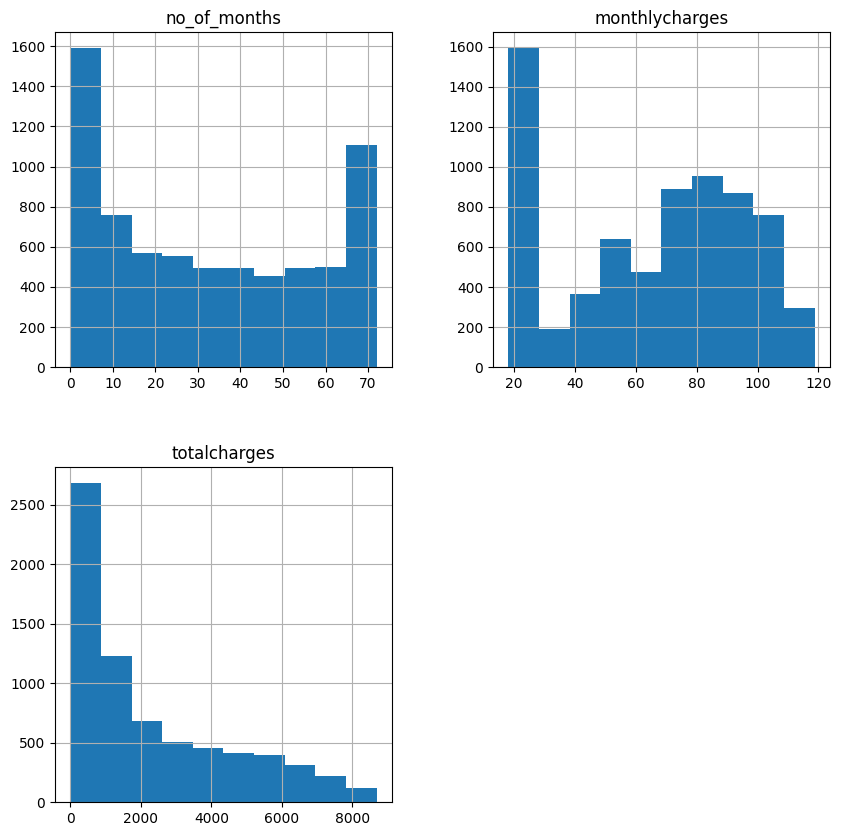

In [190]:
customer_df.hist(figsize=(10,10))

- total charge a little bit skewed

array([[<Axes: title={'center': 'no_of_months'}>,
        <Axes: title={'center': 'monthlycharges'}>],
       [<Axes: title={'center': 'totalcharges'}>, <Axes: >]], dtype=object)

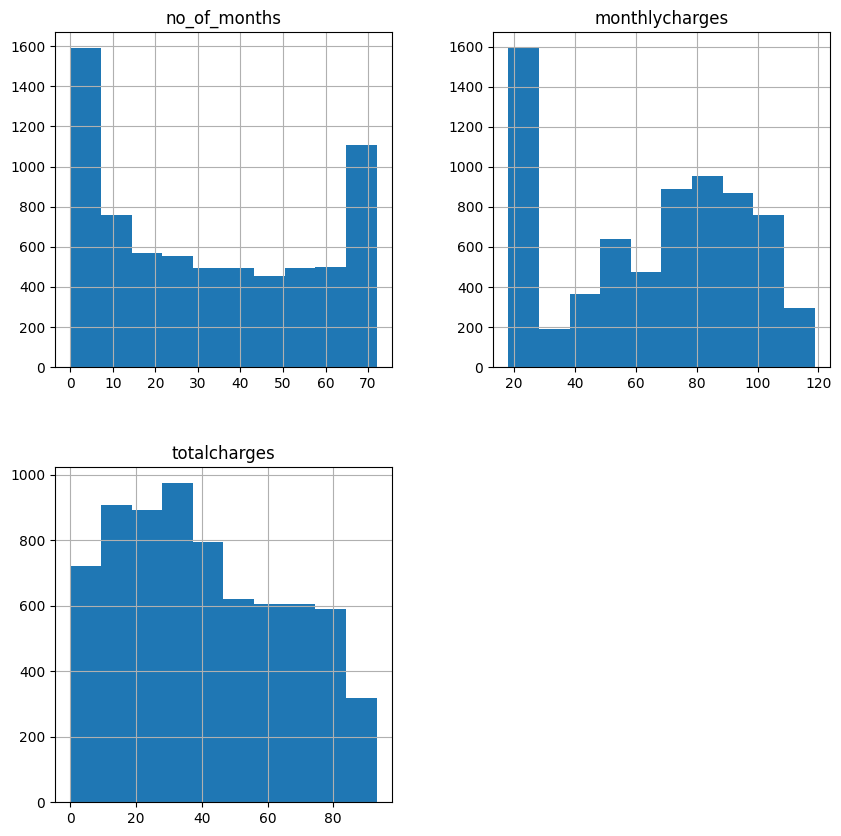

In [191]:
customer_df['totalcharges']=np.sqrt(customer_df['totalcharges'])
customer_df.hist(figsize=(10,10))

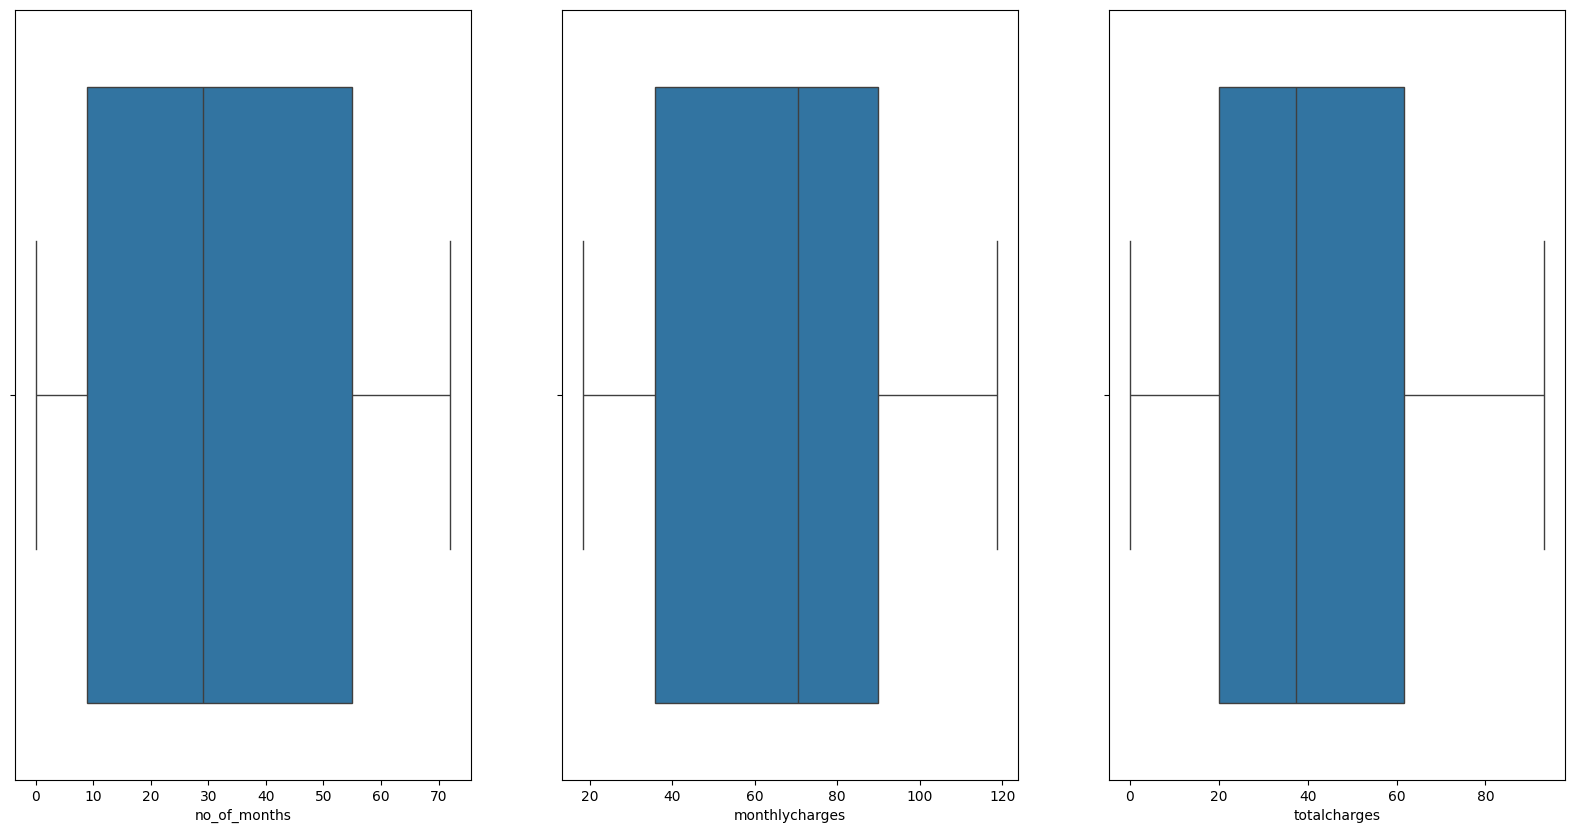

In [192]:
columns=['no_of_months','monthlycharges','totalcharges']
plt.figure(figsize=(20,10))
i=1
for col in columns:
  plt.subplot(1,3,i)
  sns.boxplot(data=customer_df,x=col)
  i+=1
plt.show()

- No outliers, good

- No of customers stay and No of customers leave

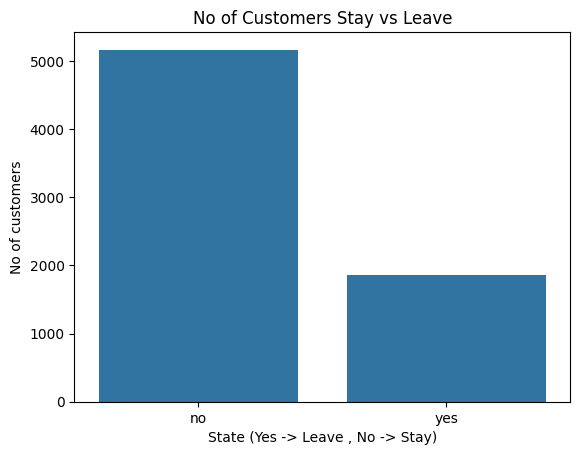

In [193]:
plt.figure()
sns.countplot(data=customer_df , x='churn')
plt.title("No of Customers Stay vs Leave")
plt.xlabel("State (Yes -> Leave , No -> Stay)")
plt.ylabel("No of customers")
plt.show()

In [194]:
rows=customer_df.shape[0]
print(np.round((customer_df[customer_df['churn']=='yes'].shape[0]/rows)*100))
print(np.round((customer_df[customer_df['churn']=='no'].shape[0]/rows)*100))

26.0
74.0


- Data is imbalanced

###Feature Selection

- My data has two parts numerical data and categorical data

- for numerical input and categorical input best choice is Anova or Kendall's and Spearman's

In [195]:
x=customer_df[['no_of_months','monthlycharges','totalcharges']]
y=customer_df[['churn']]

####Anova

In [196]:
from sklearn.feature_selection import f_classif
f_values,p_values=f_classif(x,y)
for i,col in enumerate(x):
  print(f"Feature: {col}, F_value: {f_values[i]}, P_value: {p_values[i]} ")

Feature: no_of_months, F_value: 989.5150818926645, P_value: 2.6280951730468055e-203 
Feature: monthlycharges, F_value: 275.9933817648533, P_value: 8.041921866091437e-61 
Feature: totalcharges, F_value: 362.76621068364585, P_value: 6.703520368051056e-79 


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- all of these featuers are important according to anova

#### Kendall's and Spearman's (I will use Kendall)

In [197]:
from scipy.stats import kendalltau
for col in x:
  k_value ,p_k_value =kendalltau(x[col],y)
  print(f"Featur {col} , K_value: {k_value} , P_K_value: {p_k_value}")

Featur no_of_months , K_value: -0.302224791848334 , P_K_value: 9.133417594554142e-207
Featur monthlycharges , K_value: 0.15188559311296287 , P_K_value: 1.0891500376082815e-54
Featur totalcharges , K_value: -0.18660415446379833 , P_K_value: 1.0277943495548226e-81


- all of these features are important according to kendall

#### correlation

- let's see the correlation between numecriacal features

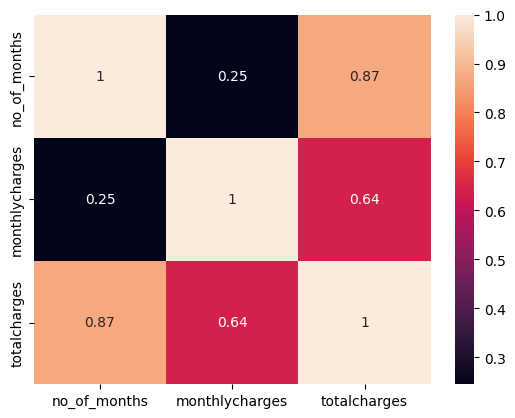

In [198]:
corr=x.corr()
sns.heatmap(corr,annot=True)
plt.show()

- there are high correlation between total charge with no_of_months and monthly charge and this case called multicolinearity

In [199]:
customer_df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'no_of_months',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

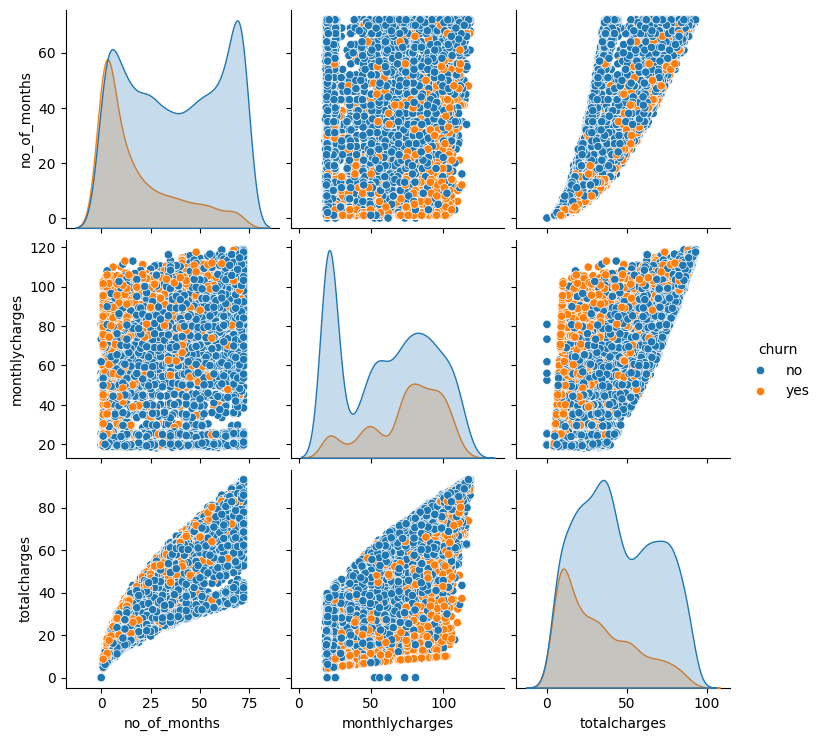

In [200]:
sns.pairplot(data=customer_df[['no_of_months','monthlycharges','totalcharges','churn']],hue='churn')

In [201]:
def is_equal(months_no,monthly_charge,total_charge):
  if (months_no*monthly_charge)==(total_charge**2):
    return "yes"
  else:
    return 'no'

customer_df['is_equal']=customer_df.apply(lambda row:is_equal(row['no_of_months'],row['monthlycharges'],row['totalcharges']),axis=1)
customer_df['is_equal'].value_counts()

,count
is_equal,
no,6720
yes,301


In [202]:
customer_df.drop(columns=['is_equal'],inplace=True)

In [203]:
customer_df.sort_values(by=['totalcharges'],ascending=False)

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4599,male,0,yes,no,72,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,one year,yes,bank transfer (automatic),117.80,93.192274,yes
4575,female,0,yes,yes,72,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,bank transfer (automatic),118.75,93.125990,no
6748,female,0,yes,yes,72,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,no,credit card (automatic),117.50,93.113372,no
5336,male,0,yes,no,72,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,credit card (automatic),116.95,92.705987,no
2182,male,0,yes,no,71,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,electronic check,116.25,92.545935,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6652,female,0,yes,yes,0,yes,yes,dsl,no,yes,yes,yes,yes,no,two year,no,mailed check,73.35,0.000000,no
1081,male,0,yes,yes,0,yes,yes,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,25.75,0.000000,no
1338,female,0,yes,yes,0,no,no phone service,dsl,yes,yes,yes,yes,yes,no,two year,no,credit card (automatic),56.05,0.000000,no
936,female,0,yes,yes,0,yes,no,dsl,yes,yes,yes,no,yes,yes,two year,no,mailed check,80.85,0.000000,no


In [204]:
customer_df.sort_values(by=['monthlycharges'],ascending=False)

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
4575,female,0,yes,yes,72,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,bank transfer (automatic),118.75,93.125990,no
2110,female,0,no,no,71,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,yes,electronic check,118.65,92.073883,no
4793,female,0,no,no,61,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,one year,yes,electronic check,118.60,85.823656,no
3885,female,0,yes,no,68,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,two year,no,mailed check,118.60,89.387080,no
5116,male,0,no,no,67,yes,yes,fiber optic,yes,yes,yes,yes,yes,yes,one year,yes,bank transfer (automatic),118.35,88.341100,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,female,0,no,no,53,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,mailed check,18.70,31.712773,no
6885,female,0,yes,yes,25,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,mailed check,18.70,19.586985,no
6634,male,0,no,no,36,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,yes,credit card (automatic),18.55,26.248809,no
1526,female,0,yes,no,59,yes,no,no,no internet service,no internet service,no internet service,no internet service,no internet service,no internet service,two year,no,bank transfer (automatic),18.40,32.524606,no


- so yah these columns are strongly correlated to each other which may confuse model and I have two solution first: drop total_charge but I founded monthly charge column can not replace total charge values with the same mean , second : PCA, and I will use PCA because total_charge is the second importand column in Anova and kendall so capture variance , will be better decision

#### PCA

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
x_pca=customer_df[['no_of_months','monthlycharges','totalcharges']]
scaler=StandardScaler()
x_pca_scaled=scaler.fit_transform(x_pca)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_pca_scaled)
joblib.dump(pca,'pca.pkl')
print(pca.explained_variance_ratio_)

[0.73500465 0.25556274]


In [206]:
all_variance=0.73500465+0.25556274
print(all_variance)

0.99056739


- then we can display these three columns with just two
- solve multicolinearity
- not losing variance of data

In [207]:
pca_df=pd.DataFrame(
    x_pca,
    columns=['PC1','PC2'],
    index=customer_df.index
)

customer_df_pca=pd.concat([customer_df,pca_df],axis=1)
customer_df_pca.head()

,gender,seniorcitizen,partner,dependents,no_of_months,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,PC1,PC2
0,female,0,yes,no,1,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,5.463515,no,-2.256425,-0.094197
1,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,43.468379,no,-0.022374,-0.256649
2,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,10.399519,yes,-1.721742,0.515034
3,male,0,no,no,45,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,42.903963,no,-0.009391,-0.910320
4,female,0,no,no,2,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,12.314625,yes,-1.404984,0.963998


In [208]:
customer_df_pca.drop(columns=['no_of_months','monthlycharges','totalcharges'],inplace=True)

In [209]:
customer_df_pca.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,PC1,PC2
0,female,0,yes,no,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,no,-2.256425,-0.094197
1,male,0,no,no,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,no,-0.022374,-0.256649
2,male,0,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,yes,-1.721742,0.515034
3,male,0,no,no,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),no,-0.009391,-0.910320
4,female,0,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,yes,-1.404984,0.963998


In [210]:
from sklearn.feature_selection import f_classif
x=customer_df_pca[['PC1','PC2']]
f_values,p_values=f_classif(x,y)
for i,col in enumerate(x):
  print(f"Feature: {col}, F_value: {f_values[i]}, P_value: {p_values[i]} ")

Feature: PC1, F_value: 219.47759507766412, P_value: 6.411403858837255e-49 
Feature: PC2, F_value: 1606.9975226632112, P_value: 1.3290371e-316 


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [211]:
from scipy.stats import kendalltau
for col in x:
  k_value ,p_k_value =kendalltau(x[col],y)
  print(f"Featur {col} , K_value: {k_value} , P_K_value: {p_k_value}")

Featur PC1 , K_value: -0.1404395851340936 , P_K_value: 4.466523366280504e-47
Featur PC2 , K_value: 0.36180142449635005 , P_K_value: 1.1710681376912511e-301


- still highly correlated with output

#### Chi2

- for categorical input and categorical output best choice is chi2

In [212]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

for col in customer_df_pca.select_dtypes(include='category'):
  customer_df_pca[col]=encoder.fit_transform(customer_df_pca[col])

In [213]:
customer_df_pca.head()

,gender,seniorcitizen,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,PC1,PC2
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,-2.256425,-0.094197
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,-0.022374,-0.256649
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,-1.721742,0.515034
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,-0.009391,-0.910320
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,-1.404984,0.963998


In [214]:
from sklearn.feature_selection import chi2
for col in customer_df_pca.select_dtypes(include='int'):
  chi_score,p_value=chi2(np.array(customer_df_pca[col]).reshape(-1,1),customer_df_pca['churn'])
  print(f"Feature: {col} , score: {chi_score} , p_value: {p_value}")

Feature: gender , score: [0.26720365] , p_value: [0.60521379]
Feature: seniorcitizen , score: [135.17050488] , p_value: [3.02999091e-31]
Feature: partner , score: [80.49091491] , p_value: [2.92044543e-19]
Feature: dependents , score: [131.2162509] , p_value: [2.2204983e-30]
Feature: phoneservice , score: [0.0874347] , p_value: [0.76746409]
Feature: multiplelines , score: [10.80609201] , p_value: [0.00101167]
Feature: internetservice , score: [9.82585338] , p_value: [0.00172076]
Feature: onlinesecurity , score: [547.62416436] , p_value: [4.13840439e-121]
Feature: onlinebackup , score: [226.5216848] , p_value: [3.41924154e-51]
Feature: deviceprotection , score: [187.98058454] , p_value: [8.77279359e-43]
Feature: techsupport , score: [519.31186199] , p_value: [5.97386792e-115]
Feature: streamingtv , score: [6.68043531] , p_value: [0.00974768]
Feature: streamingmovies , score: [7.38316934] , p_value: [0.0065837]
Feature: contract , score: [1108.88605179] , p_value: [3.86864746e-243]
Featur

- gender and phone service columns have not a high effect on output so I will drop them

In [215]:
customer_df_pca.drop(columns=['gender','phoneservice'],inplace=True)
customer_df.drop(columns=['gender','phoneservice'],inplace=True)

In [216]:
customer_df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7021 non-null   int64  
 1   partner           7021 non-null   int64  
 2   dependents        7021 non-null   int64  
 3   multiplelines     7021 non-null   int64  
 4   internetservice   7021 non-null   int64  
 5   onlinesecurity    7021 non-null   int64  
 6   onlinebackup      7021 non-null   int64  
 7   deviceprotection  7021 non-null   int64  
 8   techsupport       7021 non-null   int64  
 9   streamingtv       7021 non-null   int64  
 10  streamingmovies   7021 non-null   int64  
 11  contract          7021 non-null   int64  
 12  paperlessbilling  7021 non-null   int64  
 13  paymentmethod     7021 non-null   int64  
 14  churn             7021 non-null   int64  
 15  PC1               7021 non-null   float64
 16  PC2               7021 non-null   float64


In [217]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   seniorcitizen     7021 non-null   category
 1   partner           7021 non-null   category
 2   dependents        7021 non-null   category
 3   no_of_months      7021 non-null   int64   
 4   multiplelines     7021 non-null   category
 5   internetservice   7021 non-null   category
 6   onlinesecurity    7021 non-null   category
 7   onlinebackup      7021 non-null   category
 8   deviceprotection  7021 non-null   category
 9   techsupport       7021 non-null   category
 10  streamingtv       7021 non-null   category
 11  streamingmovies   7021 non-null   category
 12  contract          7021 non-null   category
 13  paperlessbilling  7021 non-null   category
 14  paymentmethod     7021 non-null   category
 15  monthlycharges    7021 non-null   float64 
 16  totalcharges      7021 n

- Now we have two data frame

  1- customer_df_pca -> this is ready for modling

  2- customer_df -> this is ready to visulaize and answer questions

### Visualize Data

In [218]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   seniorcitizen     7021 non-null   category
 1   partner           7021 non-null   category
 2   dependents        7021 non-null   category
 3   no_of_months      7021 non-null   int64   
 4   multiplelines     7021 non-null   category
 5   internetservice   7021 non-null   category
 6   onlinesecurity    7021 non-null   category
 7   onlinebackup      7021 non-null   category
 8   deviceprotection  7021 non-null   category
 9   techsupport       7021 non-null   category
 10  streamingtv       7021 non-null   category
 11  streamingmovies   7021 non-null   category
 12  contract          7021 non-null   category
 13  paperlessbilling  7021 non-null   category
 14  paymentmethod     7021 non-null   category
 15  monthlycharges    7021 non-null   float64 
 16  totalcharges      7021 n

In [219]:
customer_df.head()

,seniorcitizen,partner,dependents,no_of_months,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,yes,no,1,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,5.463515,no
1,0,no,no,34,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,43.468379,no
2,0,no,no,2,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,10.399519,yes
3,0,no,no,45,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,42.903963,no
4,0,no,no,2,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,12.314625,yes


what are the most services people say yes on them and stay in the company?

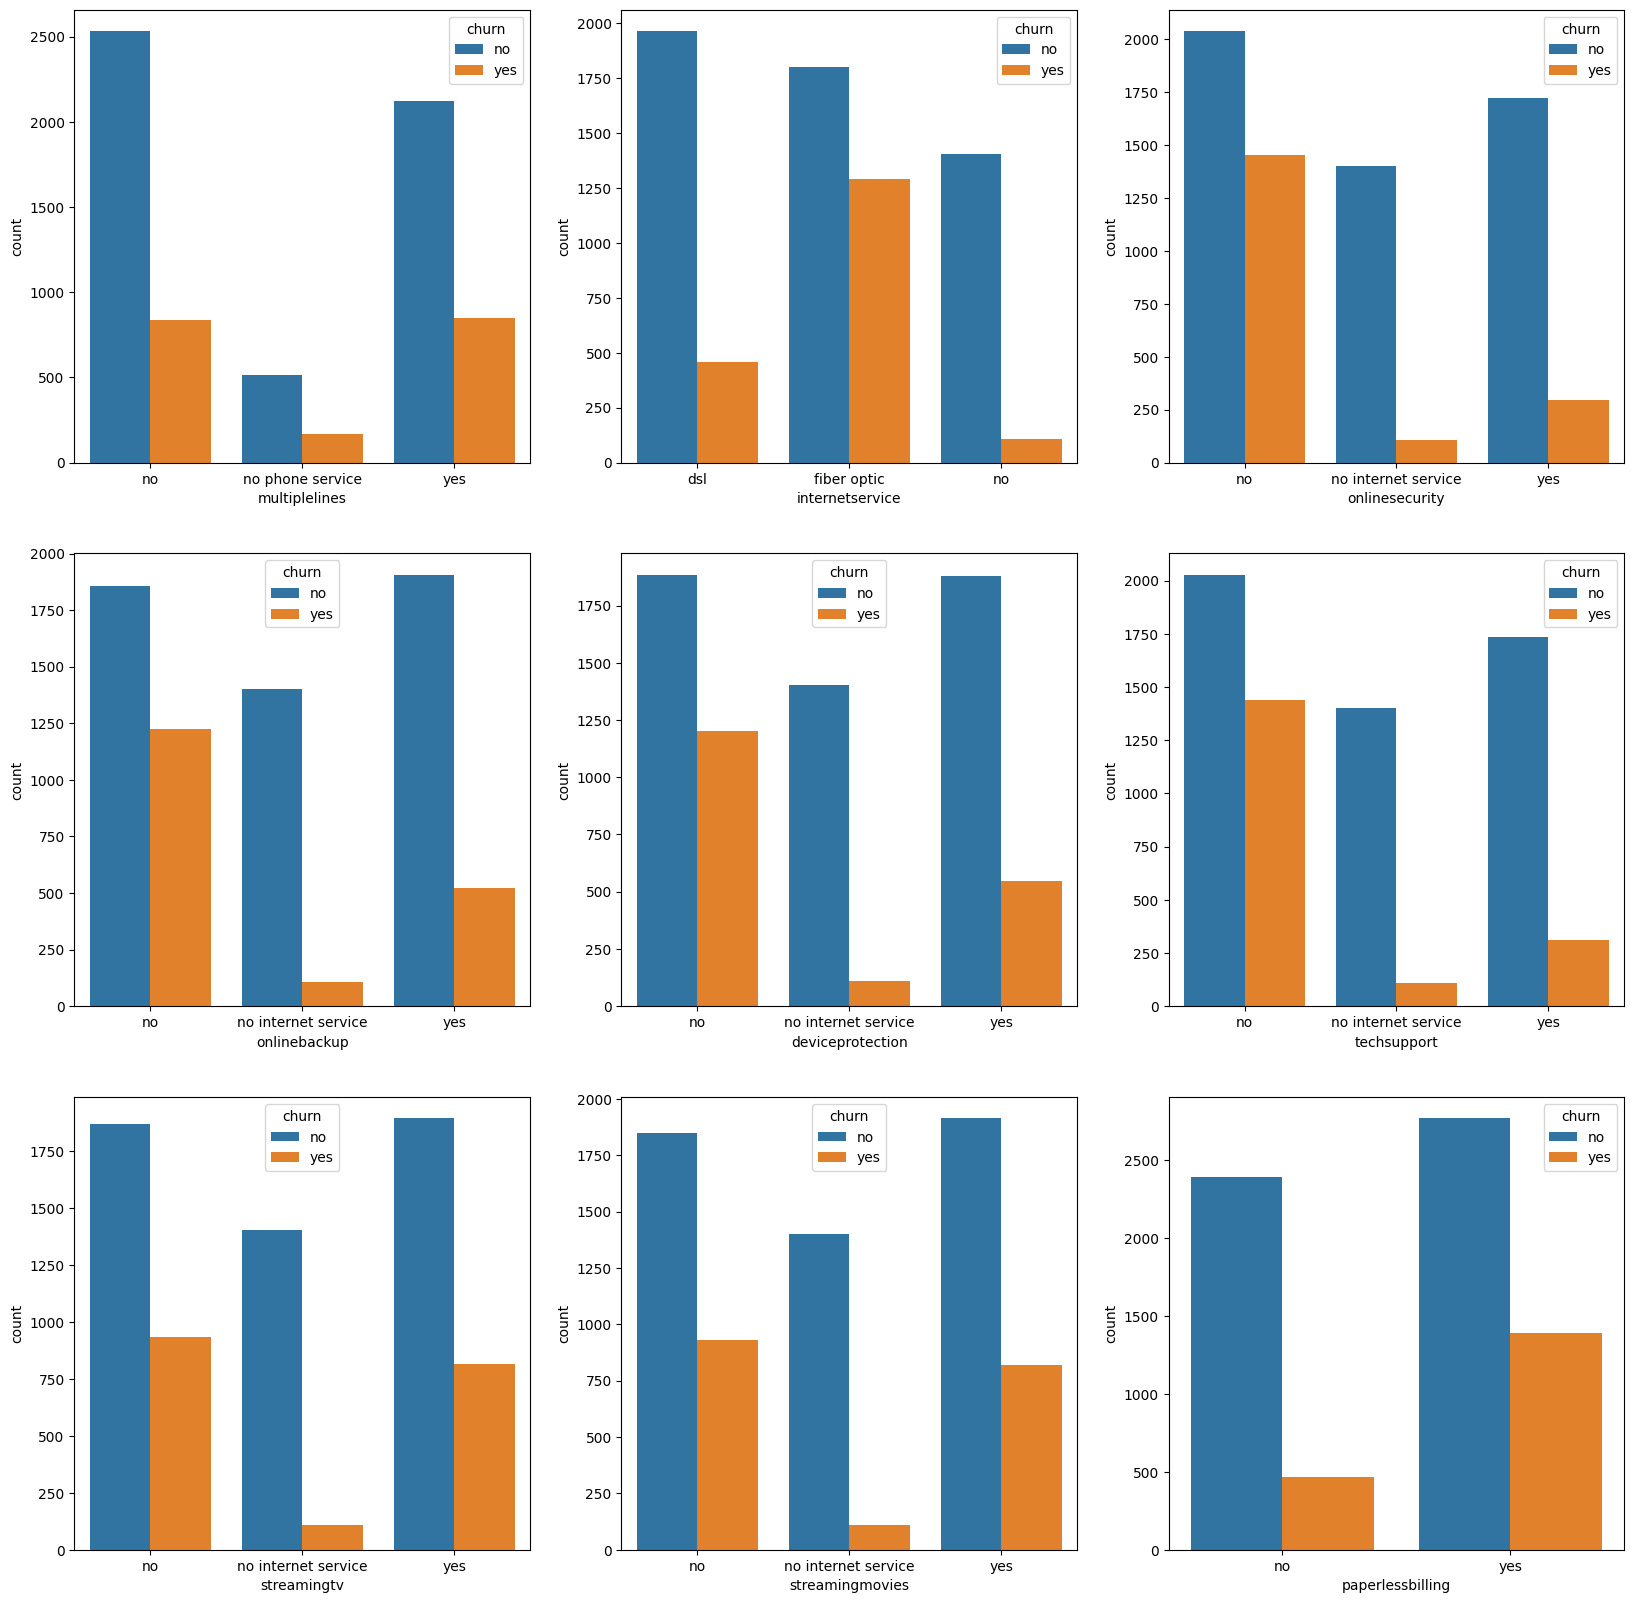

In [220]:
services=[
    'multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport',
    'streamingtv','streamingmovies','paperlessbilling'
    ]

plt.figure(figsize=(20,20))
for i,col in enumerate(services):
  plt.subplot(3,3,i+1)
  sns.countplot(data=customer_df,x=col,hue='churn')
plt.show()

if the service exist it reduce no of churn customers

- 2) is dependances/enior citizen/partner affect no of months , if customers with high dependances stay longer?

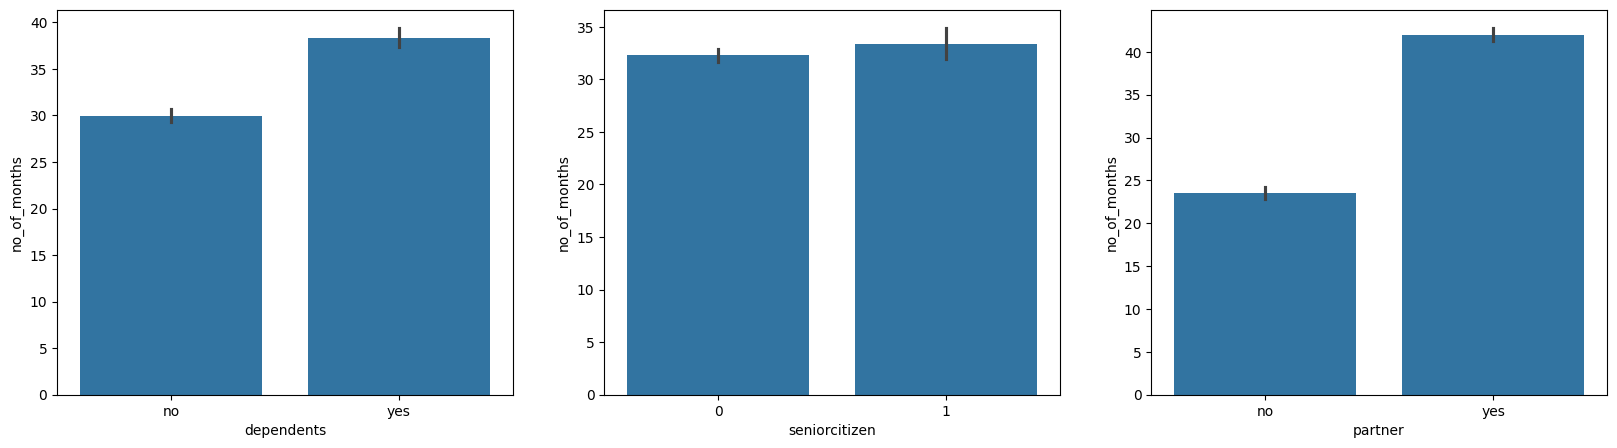

In [221]:
columns=['dependents','seniorcitizen','partner']
plt.figure(figsize=(20,5))
for i,col in enumerate(columns):
  plt.subplot(1,3,i+1)
  sns.barplot(data=customer_df,x=col,y='no_of_months')
plt.show()

- there is a difference dependent affect months

- mostly equal but still have a little difference for senior citizen

- partner column affect no of months

- let's check if it true customer with senior citizen , have dependent and partner most of them stay longer

In [222]:
customer_df[(customer_df['dependents']=='yes') & (customer_df['seniorcitizen']==1)&(customer_df['partner']=='yes')]['churn'].value_counts()

,count
churn,
no,63
yes,20


- badly some people leave .However, they have dependes , partner and be a senior citizen

- report :
  - if customer is a senior citizen , have dependent and partner mostly he will stay in the company for a long period
  - but this is not a general role some people leave also

In [223]:
customer_df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'no_of_months',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'],
      dtype='object')

3- which payment method most used from people?

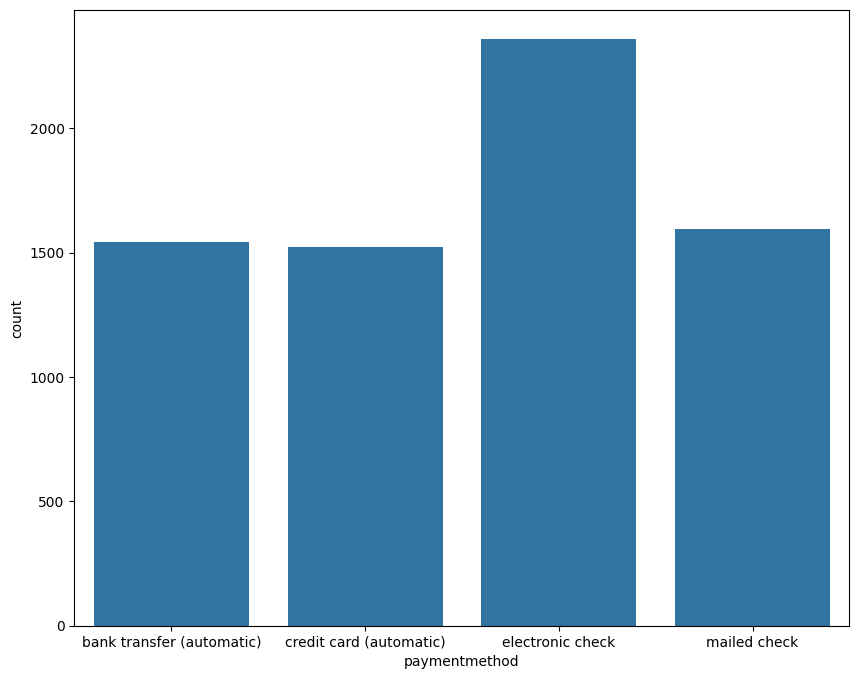

In [224]:
plt.figure(figsize=(10,8))
sns.countplot(data=customer_df,x='paymentmethod')
plt.show()

4- is electronic check give the comany the highest some or other methods can do that?

/tmp/ipython-input-1048556430.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pay_charge_df=customer_df.groupby(['paymentmethod'])['totalcharges'].sum().sort_values(ascending=False).reset_index()


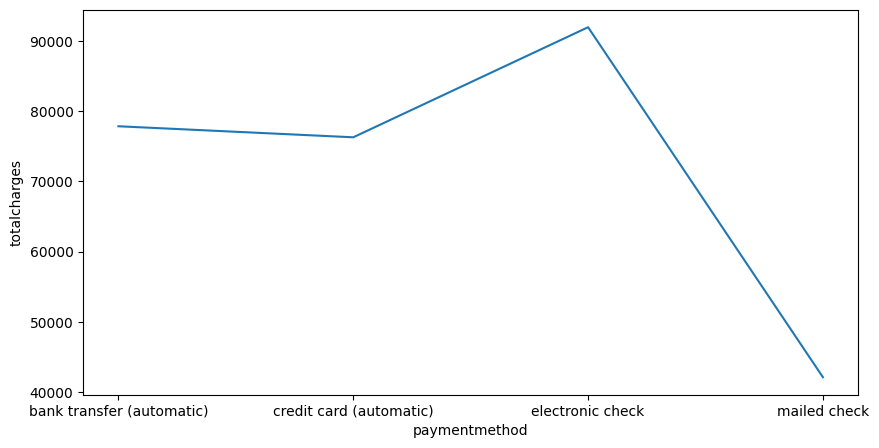

In [225]:
pay_charge_df=customer_df.groupby(['paymentmethod'])['totalcharges'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=pay_charge_df,x='paymentmethod',y='totalcharges')
plt.show()

- the amount of money got by electronic check is the highest

- 5) it also the highest between customer who leaves?

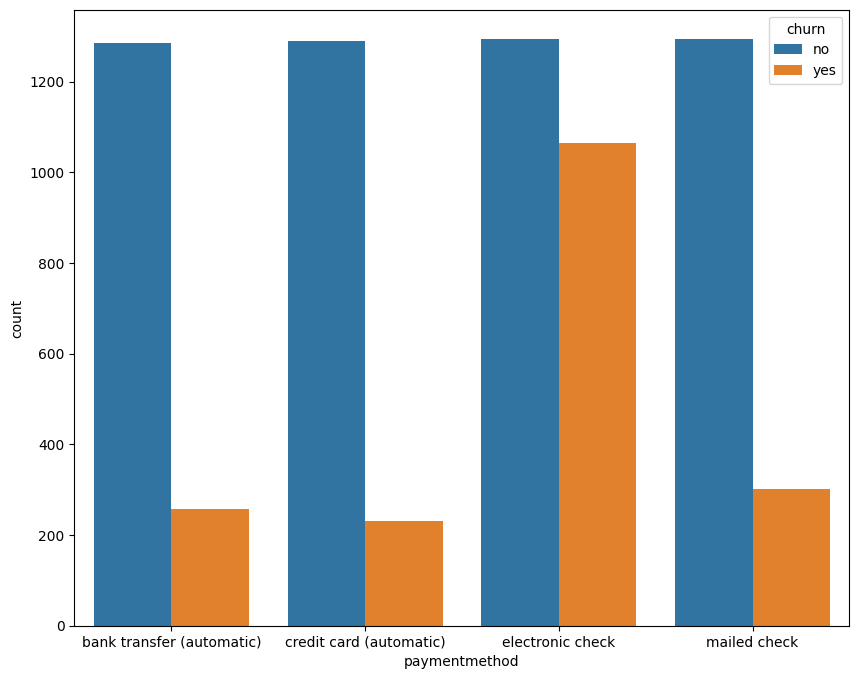

In [226]:
plt.figure(figsize=(10,8))
sns.countplot(data=customer_df,x='paymentmethod',hue='churn')
plt.show()

- most leaves peoples use electronic bill and  leaset leave people with credit card

6- what about contract?

In [227]:
customer_df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'no_of_months',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'],
      dtype='object')

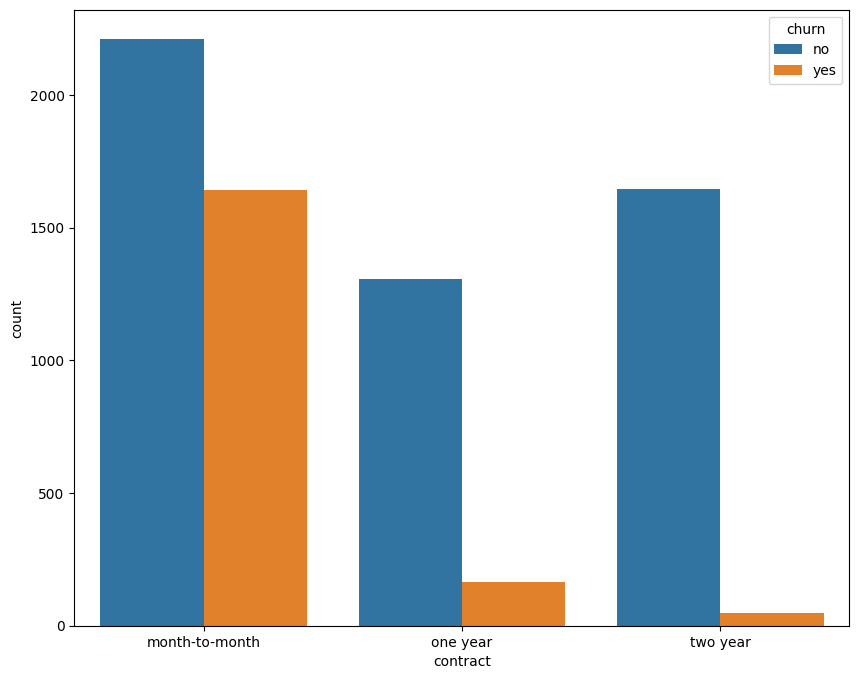

In [228]:
plt.figure(figsize=(10,8))
sns.countplot(data=customer_df,x='contract',hue='churn')
plt.show()

- long contract mean more stable customers

#### Final Report

- people with dependent , partner and senior citizen mostly stay as a customer but have three not mean they are stabel
- more services mean more stable customer
- most of customers pay with electronic bill but the most leaves customers pay with electronic bill also and least leaves peoples pay with credit card
- people with long contract are more stable

# Modeling

In [229]:
# customer_df_pca -> data frame ready for modeling from EDA
customer_df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7021 non-null   int64  
 1   partner           7021 non-null   int64  
 2   dependents        7021 non-null   int64  
 3   multiplelines     7021 non-null   int64  
 4   internetservice   7021 non-null   int64  
 5   onlinesecurity    7021 non-null   int64  
 6   onlinebackup      7021 non-null   int64  
 7   deviceprotection  7021 non-null   int64  
 8   techsupport       7021 non-null   int64  
 9   streamingtv       7021 non-null   int64  
 10  streamingmovies   7021 non-null   int64  
 11  contract          7021 non-null   int64  
 12  paperlessbilling  7021 non-null   int64  
 13  paymentmethod     7021 non-null   int64  
 14  churn             7021 non-null   int64  
 15  PC1               7021 non-null   float64
 16  PC2               7021 non-null   float64


In [230]:
customer_df_pca.head()

,seniorcitizen,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,PC1,PC2
0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,0,-2.256425,-0.094197
1,0,0,0,0,0,2,0,2,0,0,0,1,0,3,0,-0.022374,-0.256649
2,0,0,0,0,0,2,2,0,0,0,0,0,1,3,1,-1.721742,0.515034
3,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,-0.009391,-0.910320
4,0,0,0,0,1,0,0,0,0,0,0,0,1,2,1,-1.404984,0.963998


##Train Test Split

In [231]:
y=customer_df_pca['churn']
x=customer_df_pca.drop(columns=['churn'])

In [232]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7021 entries, 0 to 7020
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seniorcitizen     7021 non-null   int64  
 1   partner           7021 non-null   int64  
 2   dependents        7021 non-null   int64  
 3   multiplelines     7021 non-null   int64  
 4   internetservice   7021 non-null   int64  
 5   onlinesecurity    7021 non-null   int64  
 6   onlinebackup      7021 non-null   int64  
 7   deviceprotection  7021 non-null   int64  
 8   techsupport       7021 non-null   int64  
 9   streamingtv       7021 non-null   int64  
 10  streamingmovies   7021 non-null   int64  
 11  contract          7021 non-null   int64  
 12  paperlessbilling  7021 non-null   int64  
 13  paymentmethod     7021 non-null   int64  
 14  PC1               7021 non-null   float64
 15  PC2               7021 non-null   float64
dtypes: float64(2), int64(14)
memory usage: 877

In [233]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7021 entries, 0 to 7020
Series name: churn
Non-Null Count  Dtype
--------------  -----
7021 non-null   int64
dtypes: int64(1)
memory usage: 55.0 KB


In [234]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

## Decision Tree with imabalace data

- our data is imbalance and decision tree model is one of the best models in this case

In [235]:
# base model without any hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
base_model_rf=Pipeline(
    steps=[
        ('scaler',MinMaxScaler()),
        ('classifier',RandomForestClassifier())
    ]
)
base_model_rf.fit(x_train,y_train)
y_predict=base_model_rf.predict(x_test)
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.795017793594306
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1053
           1       0.61      0.49      0.55       352

    accuracy                           0.80      1405
   macro avg       0.73      0.69      0.71      1405
weighted avg       0.78      0.80      0.79      1405



In [236]:
base_model_rf.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('classifier', RandomForestClassifier())],
 'transform_input': None,
 'verbose': False,
 'scaler': MinMaxScaler(),
 'classifier': RandomForestClassifier(),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'classifier__bootstrap': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__class_weight': None,
 'classifier__criterion': 'gini',
 'classifier__max_depth': None,
 'classifier__max_features': 'sqrt',
 'classifier__max_leaf_nodes': None,
 'classifier__max_samples': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__monotonic_cst': None,
 'classifier__n_estimators': 100,
 'classifier__n_jobs': None,
 'classifier__oob_score': False,
 'classifier__random_state': None,
 'classifier__verbose': 0,
 'classifier__warm_start': False}

In [237]:
# optimize model with GridSearch
from sklearn.model_selection import GridSearchCV
param_grid={
    'classifier__n_estimators':[100,101,102],
    'classifier__max_depth':[6,7,8],
    'classifier__class_weight':['balanced']
}
grid_search=GridSearchCV(
    estimator=base_model_rf,
    param_grid=param_grid,
    cv=5,
    verbose=2
)
grid_search.fit(x_train,y_train)
print("="*100)
print(f"Best Param : {grid_search.best_params_}")
grid_y_predict=grid_search.predict(x_test)
print(accuracy_score(y_test,grid_y_predict))
print(classification_report(y_test,grid_y_predict))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0

- it is one of the best result I got
- this result without make any solution to Imbalance data may be is good
- but let's try other solutions

## Fix Imbalance Data and Modeling

- visualize data to check it's linearity

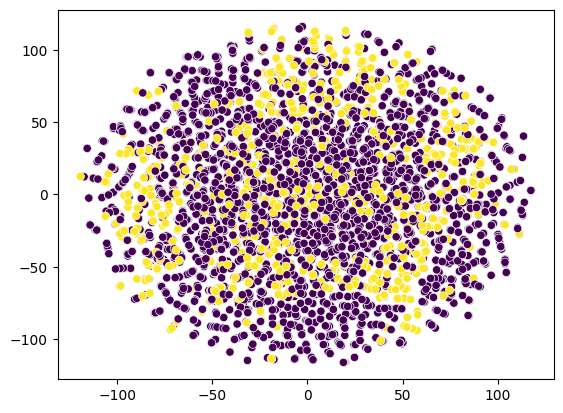

In [238]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(x)
sns.scatterplot(x=x_tsne[:,0] , y=x_tsne[:,1] , c=y)
plt.show()

- Data is complex so I will check  Knn - SVM - Random Forest Models with imbalance data solutions

### Base Pipleline Models

- Random Forest is algorithm that make embeded feature selection
- I will use Ridge Feature Selection Embeded method in KNN , SVM

In [239]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn_pipeline=Pipeline(
    steps=[
        ('scaler',MinMaxScaler()),
        ('feature_selection',SelectFromModel(RidgeClassifier())),
        ('classifier',KNeighborsClassifier())
    ]
)

# SVM with ridge
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_selection import SelectFromModel
svm_pipleline=Pipeline(
    steps=[
        ('scaler',StandardScaler()),
        ('feature_selection',SelectFromModel(RidgeClassifier())),
        ('classifier',SVC())
    ]
)

# Random Forest with ridge

from sklearn.ensemble import RandomForestClassifier

rfc_pipeline=Pipeline(
    steps=[
        ('scaler',MinMaxScaler()),
        ('classifier',RandomForestClassifier())
    ]
)

### trying cross validation alone

In [240]:
x=customer_df_pca.drop(columns=['churn'])
y=customer_df_pca['churn']
x_trian,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42,shuffle=True)

In [242]:
# SVM and Ridge
param_grid_svm={
    'feature_selection__estimator__alpha':[0.1,1,10], # ridge alpha
    'classifier__kernel':['rbf'],
    'classifier__C':[0.1,1,10],
    'classifier__gamma':['scale',0.01,0.1,1]
}

grid_search_svm=GridSearchCV(
    estimator=svm_pipleline,
    param_grid=param_grid_svm,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_svm.fit(x_train,y_train)
print(grid_search_svm.best_params_)
y_predict_svm=grid_search_svm.predict(x_test)
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   1.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.9s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.5s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.6s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.5s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; total time=   0.5s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; to

In [243]:
# KNN with Ridge
knn_param_grid={
    'feature_selection__estimator__alpha':[0.1,1,10],
    'classifier__n_neighbors':[3,5,7,9,11,15],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['minkowski'],
    'classifier__p':[1,2]
}

grid_search_knn=GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_knn.fit(x_train,y_train)
print(grid_search_knn.best_params_)
y_predict_knn=grid_search_knn.predict(x_test)
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.1s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.1s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__

- cross validation alone has a very bad results

### Sampling

In [244]:
class_0_count,class_1_count=customer_df_pca['churn'].value_counts()
print(class_0_count)
print(class_1_count)

5164
1857


In [245]:
df_class_0=customer_df_pca[customer_df_pca['churn']==0]
df_class_1=customer_df_pca[customer_df_pca['churn']==1]
print(df_class_0.shape)
print(df_class_1.shape)

(5164, 17)
(1857, 17)


### Under Sampling

In [246]:
df_class_0_under=df_class_0.sample(class_1_count,random_state=42)
# df_class_0_under.shape
df_under=pd.concat([df_class_1,df_class_0_under])
df_under.shape

(3714, 17)

In [247]:
x=df_under.drop(columns=['churn'])
y=df_under['churn']


In [248]:
x.shape

(3714, 16)

In [249]:
y.shape

(3714,)

In [250]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [251]:
# Random Forest

param_grid_rfc_under={
    'classifier__n_estimators':[100,101,102],
    'classifier__max_depth':[6,7,8],
    'classifier__class_weight':['balanced']
}
grid_search_rfc_under=GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid_rfc_under,
    cv=5,
    verbose=2
)
grid_search_rfc_under.fit(x_train,y_train)
print("="*100)
print(f"Best Param : {grid_search_rfc_under.best_params_}")
grid_y_predict_rfc_under=grid_search_rfc_under.predict(x_test)
print(accuracy_score(y_test,grid_y_predict_rfc_under))
print(classification_report(y_test,grid_y_predict_rfc_under))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.5s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.4s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.3s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.3s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0

In [252]:
# SVM and Ridge
param_grid_svm_under={
    'feature_selection__estimator__alpha':[0.1,1,10], # ridge alpha
    'classifier__kernel':['rbf'],
    'classifier__C':[0.1,1,10],
    'classifier__gamma':['scale',0.01,0.1,1]
}

grid_search_svm_under=GridSearchCV(
    estimator=svm_pipleline,
    param_grid=param_grid_svm_under,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_svm_under.fit(x_train,y_train)
y_predict_svm_under=grid_search_svm_under.predict(x_test)
print(accuracy_score(y_test,y_predict_svm_under))
print(classification_report(y_test,y_predict_svm_under))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; total time=   0.2s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; to

In [253]:
print(grid_search_svm_under.best_params_)

{'classifier__C': 0.1, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'feature_selection__estimator__alpha': 0.1}


In [254]:
# KNN with Ridge
knn_param_grid_under={
    'feature_selection__estimator__alpha':[0.1,1,10],
    'classifier__n_neighbors':[3,5,7,9,11,15],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['minkowski'],
    'classifier__p':[1,2]
}

grid_search_knn_under=GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid_under,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_knn_under.fit(x_train,y_train)
print(grid_search_knn_under.best_params_)
y_predict_knn_under=grid_search_knn_under.predict(x_test)
print(accuracy_score(y_test,y_predict_knn_under))
print(classification_report(y_test,y_predict_knn_under))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__

- knn is the best model in Under Sampling

### Over Sampling

In [255]:
class_1_over=df_class_1.sample(class_0_count,random_state=42 , replace=True)
class_1_over.shape

(5164, 17)

In [256]:
df_over=pd.concat([class_1_over,df_class_0])
df_over.shape

(10328, 17)

In [257]:
x=df_over.drop(columns=['churn'])
y=df_over['churn']
print(x.shape)
print(y.shape)

(10328, 16)
(10328,)


In [258]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [259]:
# Random Forest

param_grid_rfc_over={
    'classifier__n_estimators':[100,101,102],
    'classifier__max_depth':[6,7,8],
    'classifier__class_weight':['balanced']
}
grid_search_rfc_over=GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid_rfc_over,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_rfc_over.fit(x_train,y_train)
print("="*100)
print(f"Best Param : {grid_search_rfc_over.best_params_}")
grid_y_predict_rfc_over=grid_search_rfc_over.predict(x_test)
print(accuracy_score(y_test,grid_y_predict_rfc_over))
print(classification_report(y_test,grid_y_predict_rfc_over))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.8s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0.6s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   0

In [260]:
# SVM and Ridge
param_grid_svm_over={
    'feature_selection__estimator__alpha':[0.1,1,10], # ridge alpha
    'classifier__kernel':['rbf'],
    'classifier__C':[0.1,1,10],
    'classifier__gamma':['scale',0.01,0.1,1]
}

grid_search_svm_over=GridSearchCV(
    estimator=svm_pipleline,
    param_grid=param_grid_svm_over,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_svm_over.fit(x_train,y_train)
y_predict_svm_over=grid_search_svm_over.predict(x_test)
print(accuracy_score(y_test,y_predict_svm_over))
print(classification_report(y_test,y_predict_svm_over))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   1.7s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   1.7s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   1.7s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   2.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   2.6s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; total time=   2.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; to

In [261]:
# KNN with Ridge
knn_param_grid_over={
    'feature_selection__estimator__alpha':[0.1,1,10],
    'classifier__n_neighbors':[3,5,7,9,11,15],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['minkowski'],
    'classifier__p':[1,2]
}

grid_search_knn_over=GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid_over,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_knn_over.fit(x_train,y_train)
print(grid_search_knn_over.best_params_)
y_predict_knn_over=grid_search_knn_over.predict(x_test)
print(accuracy_score(y_test,y_predict_knn_over))
print(classification_report(y_test,y_predict_knn_over))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__

- knn is the best here also

### STOME Method

In [262]:
! pip install imbalanced-learn

In [263]:
x=customer_df_pca.drop(columns=['churn'])
y=customer_df_pca['churn']
y.value_counts()

,count
churn,
0,5164
1,1857


In [264]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x,y)
y_sm.value_counts()

,count
churn,
0,5164
1,5164


In [265]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,shuffle=True)

In [266]:
# Random Forest

param_grid_rfc_smote={
    'classifier__n_estimators':[100,101,102],
    'classifier__max_depth':[6,7,8],
    'classifier__class_weight':['balanced']
}
grid_search_rfc_smote=GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=param_grid_rfc_smote,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_rfc_smote.fit(x_train,y_train)
print("="*100)
print(f"Best Param : {grid_search_rfc_smote.best_params_}")
grid_y_predict_rfc_smote=grid_search_rfc_smote.predict(x_test)
print(accuracy_score(y_test,grid_y_predict_rfc_smote))
print(classification_report(y_test,grid_y_predict_rfc_smote))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   1.4s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   0.9s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   1.2s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=100; total time=   2.2s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   2.4s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   1.3s
[CV] END classifier__class_weight=balanced, classifier__max_depth=6, classifier__n_estimators=101; total time=   1

In [267]:
# SVM and Ridge
param_grid_svm_smote={
    'feature_selection__estimator__alpha':[0.1,1,10], # ridge alpha
    'classifier__kernel':['rbf'],
    'classifier__C':[0.1,1,10],
    'classifier__gamma':['scale',0.01,0.1,1]
}

grid_search_svm_smote=GridSearchCV(
    estimator=svm_pipleline,
    param_grid=param_grid_svm_smote,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_svm_smote.fit(x_train,y_train)
y_predict_svm_smote=grid_search_svm_smote.predict(x_test)
print(accuracy_score(y_test,y_predict_svm_smote))
print(classification_report(y_test,y_predict_svm_smote))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   3.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   3.7s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   5.3s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   4.9s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=0.1; total time=   3.4s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; total time=   5.9s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf, feature_selection__estimator__alpha=1; to

In [268]:
# KNN with Ridge
knn_param_grid_smote={
    'feature_selection__estimator__alpha':[0.1,1,10],
    'classifier__n_neighbors':[3,5,7,9,11,15],
    'classifier__weights':['uniform','distance'],
    'classifier__metric':['minkowski'],
    'classifier__p':[1,2]
}

grid_search_knn_smote=GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_param_grid_smote,
    cv=5,
    verbose=2,
    scoring='f1'
)
grid_search_knn_smote.fit(x_train,y_train)
print(grid_search_knn_smote.best_params_)
y_predict_knn_smote=grid_search_knn_smote.predict(x_test)
print(accuracy_score(y_test,y_predict_knn_smote))
print(classification_report(y_test,y_predict_knn_smote))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.1s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.1s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__p=1, classifier__weights=uniform, feature_selection__estimator__alpha=0.1; total time=   0.0s
[CV] END classifier__metric=minkowski, classifier__n_neighbors=3, classifier__

# Final Model

In [269]:
# knn model with oversampling is the best model
# f1_score for zero class --> 0.83
# f1_score for one class --> 0.87
# accuracy -->  0.86

""" Let's know the columns chosen by ridge """

best_pipe=grid_search_knn_over.best_estimator_
mask=best_pipe.named_steps['feature_selection'].get_support()
selected_feature=x_train.columns[mask]
print(selected_feature.tolist())

['onlinesecurity', 'techsupport', 'contract', 'PC1', 'PC2']


In [272]:
joblib.dump(best_pipe,"final_model.pkl")

['final_model.pkl']

# Simple Deployment

In [273]:
customer_df.columns

Index(['seniorcitizen', 'partner', 'dependents', 'no_of_months',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges',
       'totalcharges', 'churn'],
      dtype='object')

In [274]:
customer_df.head()

,seniorcitizen,partner,dependents,no_of_months,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,0,yes,no,1,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,29.85,5.463515,no
1,0,no,no,34,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,56.95,43.468379,no
2,0,no,no,2,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,53.85,10.399519,yes
3,0,no,no,45,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,42.903963,no
4,0,no,no,2,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,70.70,12.314625,yes


In [275]:
customer_df['internetservice'].unique()

['dsl', 'fiber optic', 'no']
Categories (3, object): ['dsl', 'fiber optic', 'no']

In [276]:
customer_df_pca.columns

Index(['seniorcitizen', 'partner', 'dependents', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn', 'PC1', 'PC2'],
      dtype='object')

In [294]:
# It is my first try and I will make it so simple to trying enter values to model (which is more important now)
# no_of_months=2
# monthlycharges = 10
# totalcharges=30
pca=joblib.load('pca.pkl')
pca_features=pca.transform([[2,10,np.sqrt(30)]])
# print(pca_features)
new_data=pd.DataFrame([{
    "seniorcitizen":1,
    "partner":0,
    "dependents":0,
    "multiplelines":0,
    "internetservice":0,
    "onlinesecurity":0,
    "onlinebackup":0,
    "deviceprotection":1,
    "techsupport":1,
    "streamingtv":1,
    "streamingmovies":0,
    "contract":1,
    "paperlessbilling":0,
    "paymentmethod":1,
    "PC1":pca_features[:,0],
    "PC2":pca_features[:,1]}])


# print(new_data["PC1"])
# print(new_data["PC2"])

model=joblib.load('final_model.pkl')
prediction=model.predict(new_data)
print(prediction)

[1]
